# Import library

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import rasterstats
import rasterio
from osgeo import gdal

from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [24]:
from rasterio.plot import show

In [68]:
import glob

In [69]:
import subprocess

In [73]:
import os

# Read LAD

In [29]:
polygon = gpd.read_file(r'./LAD/Local_Authority_Districts_(May_2021)_UK_BFE/LAD_MAY_2021_UK_BFE_V2.shp')

In [19]:
england = pd.read_excel('England_class.xlsx')

In [20]:
england_poly = pd.merge(england, polygon, left_on='LAD', right_on='LAD21CD', how='left')

In [21]:
england_poly_geo = gpd.GeoDataFrame(england_poly, crs="EPSG:27700", geometry=england_poly['geometry'])

In [32]:
print(england_poly_geo.crs)

EPSG:27700


In [40]:
import pyproj

In [43]:
proj_crs = pyproj.CRS.from_string('ESRI:54009')

In [49]:
england_poly_geo = england_poly_geo.to_crs(proj_crs)

In [50]:
print(england_poly_geo.crs)

ESRI:54009


# Read raster

In [77]:
be = rasterio.open('./Urban/Mosaic/BE_Mosaic.tif', mode = 'r')

In [70]:
files_to_mosaic = glob.glob('./Urban/Mosaic/*_100_V1_0.tif')
files_to_mosaic

['./Urban/Mosaic/R3_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif',
 './Urban/Mosaic/R3_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif',
 './Urban/Mosaic/R4_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif',
 './Urban/Mosaic/R4_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif']

In [71]:
files_string = " ".join(files_to_mosaic)
print(files_string)

./Urban/Mosaic/R3_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif ./Urban/Mosaic/R3_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif ./Urban/Mosaic/R4_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif ./Urban/Mosaic/R4_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif


In [74]:
command = "gdal_merge.py -o ./Urban/Mosaic/BE_Mosaic.tif -of gtiff " + files_string
print(os.popen(command).read())

0...10...20...30...40...50...60...70...80...90...100 - done.



In [76]:
print(os.popen('ls ./Urban/Mosaic/').read())

BE_Mosaic.tif
R3_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif
R3_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif
R4_C18_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif
R4_C19_GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif



In [78]:
print(be.crs)

PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


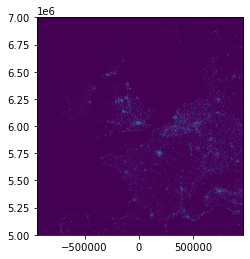

<AxesSubplot:>

In [79]:
show(be)

### plotting raster and shapefile

<AxesSubplot:title={'center':'built env'}>

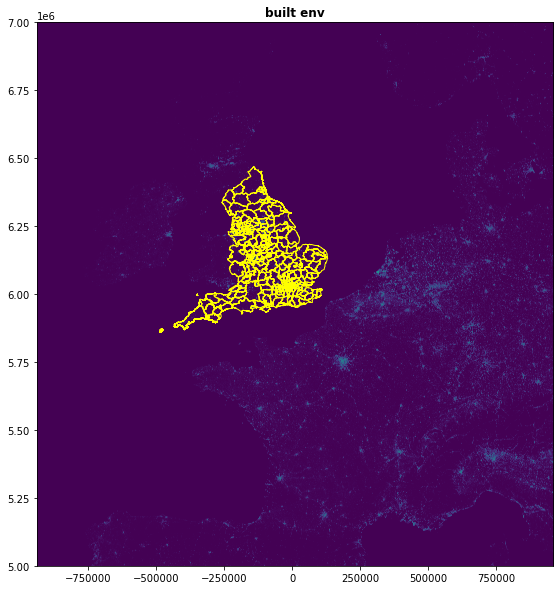

In [103]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
show(be, ax = ax, title  = 'built env')
#show(raster_2, ax = ax, title  = 'raster_2')
#show(raster_3, ax = ax, title  = 'raster_3')
#show(raster_4, ax = ax, title  = 'raster_4')
england_poly_geo.plot(ax = ax, facecolor = 'None',
                     edgecolor = 'yellow')
#show_hist(raster_1, title = 'histogram', ax = ax2)
#plt.show()

In [58]:
from rasterio.plot import show_hist

# Assign raster values to a numpy array

In [94]:
be_array_1 = be.read(1)

In [95]:
be_array_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [96]:
be.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 19000,
 'height': 20000,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(100.0, 0.0, -941000.0,
        0.0, -100.0, 7000000.0)}

In [97]:
be.nodata

In [98]:
affine = be.transform

# calculating the zonal statistics

In [131]:
# filter out empty or null geometries
england_poly_geo = england_poly_geo[~(england_poly_geo['geometry'].is_empty | england_poly_geo['geometry'].isna())]

In [132]:
stats = rasterstats.zonal_stats(england_poly_geo, be_array_1, affine = affine, stats = ['mean'])

/opt/conda/envs/sds2021/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [133]:
# Join stats to gdf 
df = pd.DataFrame(stats)

In [134]:
df = pd.concat([england_poly_geo, df], axis=1)

In [135]:
built = gpd.GeoDataFrame(df, geometry = df.geometry)
built.head()

,LAD,LAD_Name,Country,Region,County_Code,County_Name,OBJECTID,LAD21CD,LAD21NM,BNG_E,BNG_N,LONG,LAT,SHAPE_Leng,SHAPE_Area,geometry,mean
0,E06000001,Hartlepool,England,North East,E06000001,Hartlepool,1.0,E06000001,Hartlepool,447160.0,531474.0,-1.27018,54.676140,66110.011028,9.835107e+07,"POLYGON ((-90160.490 6359038.856, -90144.116 6...",946.039385
1,E06000002,Middlesbrough,England,North East,E06000002,Middlesbrough,2.0,E06000002,Middlesbrough,451141.0,516887.0,-1.21099,54.544670,41055.789790,5.455359e+07,"POLYGON ((-89115.357 6345480.407, -89002.190 6...",1984.321835
2,E06000003,Redcar and Cleveland,England,North East,E06000003,Redcar and Cleveland,3.0,E06000003,Redcar and Cleveland,464361.0,519597.0,-1.00608,54.567520,105292.103526,2.537854e+08,"POLYGON ((-81203.904 6351144.074, -80985.739 6...",675.288515
3,E06000004,Stockton-on-Tees,England,North East,E06000004,Stockton-on-Tees,4.0,E06000004,Stockton-on-Tees,444940.0,518183.0,-1.30664,54.556911,108085.190140,2.097308e+08,"POLYGON ((-93750.320 6350849.264, -93740.521 6...",1024.212821
4,E06000005,Darlington,England,North East,E06000005,Darlington,5.0,E06000005,Darlington,428029.0,515648.0,-1.56835,54.535339,107203.152334,1.974778e+08,"POLYGON ((-116603.223 6348061.713, -116603.622...",522.227973


In [139]:
built.to_csv(r'./OUTPUT/Built_Environment_Density.csv')

<AxesSubplot:>

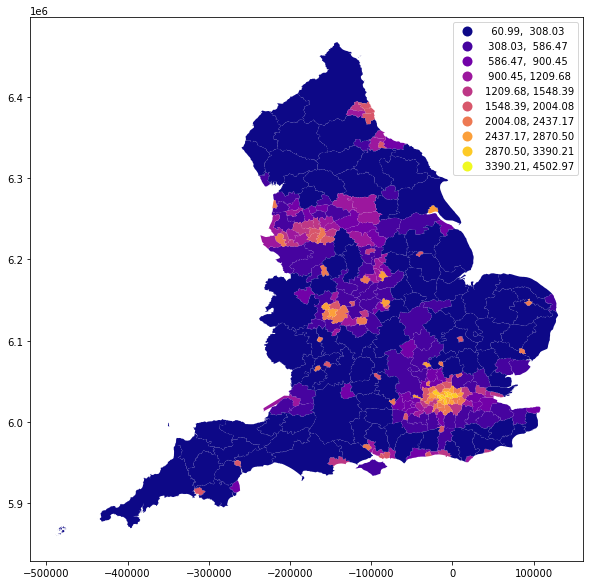

In [136]:
built.plot(column='mean', cmap='plasma', 
         scheme='FisherJenks', k=10, edgecolor='None', legend=True, figsize=(10,10))